In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data1=data[['LSTAT','MEDV']]
data2=data[['RM','MEDV']]
data2=data2.rename(columns={'RM':'x', 'MEDV':'y'})
data3=data2

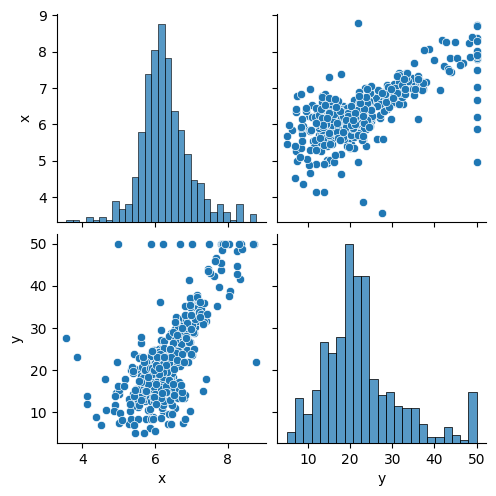

In [5]:
sns.pairplot(data2)

In [8]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
x=data2['x']
y=data2['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [9]:
data2=pd.DataFrame({'x':x_train.squeeze(),'y':y_train.squeeze()})
data2

data3=pd.DataFrame({'x':x_test.squeeze(),'y':y_test.squeeze()})
data3

,x,y
173,6.416,23.6
274,6.758,32.4
491,5.983,13.6
72,6.065,22.8
452,6.297,16.1
...,...,...
441,6.406,17.1
23,5.813,14.5
225,8.725,50.0
433,6.436,14.3


In [32]:
data2.head()
data2['x2']=data2['x']*data2['x']
data2['x3']=data2['x']*data2['x2']
data2['x4']=data2['x']*data2['x3']
data2['xy']=data2['x']*data2['y']
data2['x2y']=data2['x2']*data2['y']

In [33]:
data2['Y']=data2['y'].apply(np.log)
data2['X']=data2['x'].apply(np.log)
data2['XY']=data2['Y']*data2['X']
data2['X2']=data2['X']*data2['X']


In [16]:
sumx=data2['x'].sum()
sumx2=data2['x2'].sum()
sumx3=data2['x3'].sum()
sumx4=data2['x4'].sum()
sumy=data2['y'].sum()
sumxy=data2['xy'].sum()
sumx2y=data2['x2y'].sum()
sumX=data2['X'].sum()
sumY=data2['Y'].sum()
sumXY=data2['XY'].sum()
sumX2=data2['X2'].sum()
n=data2['x'].count()

In [90]:
n

354

In [34]:
data2.head()

,x,y,x2,x3,x4,xy,x2y,Y,X,XY,X2
5,6.430,28.7,41.344900,265.847707,1709.400756,184.5410,1186.598630,3.356897,1.860975,6.247100,3.463226
116,6.176,21.2,38.142976,235.571020,1454.886618,130.9312,808.631091,3.054001,1.820671,5.560331,3.314842
45,5.682,19.3,32.285124,183.444075,1042.329232,109.6626,623.102893,2.960105,1.737303,5.142600,3.018223
16,5.935,23.1,35.224225,209.055775,1240.746027,137.0985,813.679597,3.139833,1.780867,5.591624,3.171487
468,5.926,19.1,35.117476,208.106163,1233.237121,113.1866,670.743792,2.949688,1.779349,5.248526,3.166084


In [92]:
print(sumx,sumy,sumx2,sumx3,sumx4,sumxy,sumx2y)

2239.288 8147.6 14347.59647 93122.79332965 612439.8617132099 53203.961800000005 352460.99008500006


In [27]:
# Finding cofficient of the the quadratic function 
A=np.array([[sumx2,sumx,n],[sumx3,sumx2,sumx],[sumx4,sumx3,sumx2]])
B=np.array([sumy,sumxy,sumx2y])

coff=np.linalg.solve(A,B)
coff

array([  2.181199  , -19.12845562,  55.61231071])

In [26]:
# Finding the cofficient of linear function
A2=np.array([[sumx,n],[sumx2,sumx]])
B2=np.array([sumy,sumxy])
coff2=np.linalg.solve(A2,B2)
coff2

array([  9.1181022 , -34.66230744])

In [49]:
# Finding the cofficient of linearly transformed exponential regression
A2=np.array([[n,sumX],[sumX,sumX2]])
B2=np.array([sumY,sumXY])
coff3=np.linalg.solve(A2,B2)
coff3

array([-1.07575783,  2.24684349])

In [50]:
a=np.exp(coff3[0])
b=coff3[1]


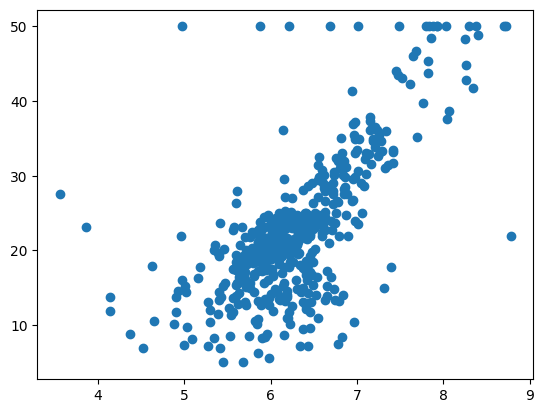

In [39]:
plt.scatter(data['RM'],data['MEDV'])


In [51]:
# Predicted Quadratic Function
def soln(x):
    y=coff[0]*(x**2)+coff[1]*x+coff[2]
    return y



In [52]:
#Predicted Linear Function
def soln2(x):
    y=coff2[0]*x+coff2[1]
    return y

In [53]:
#Predicted Exponential Function
def soln3(x):
    y=a*(x**b)
    return y


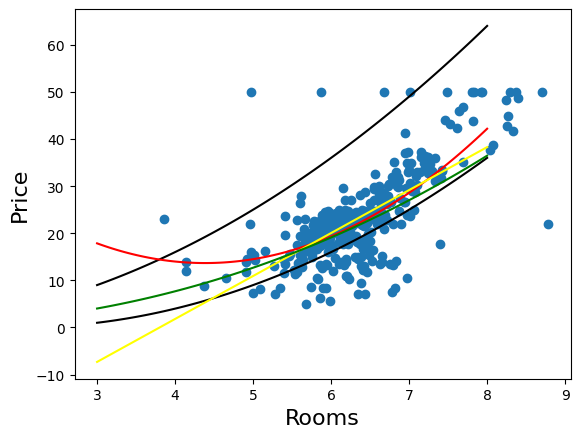

In [55]:

array=np.linspace(3,8,100)
plt.xlabel("Rooms",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.scatter(data2['x'],data2['y'])
plt.plot(array,np.vectorize(lambda x:((x)**2)/1)(array),'black')
plt.plot(array,np.vectorize(lambda x:((x-2)**2)/1)(array),'black')
plt.plot(array,np.vectorize(soln)(array),'r')
plt.plot(array,np.vectorize(soln2)(array),'yellow')
plt.plot(array,np.vectorize(soln3)(array),'green')

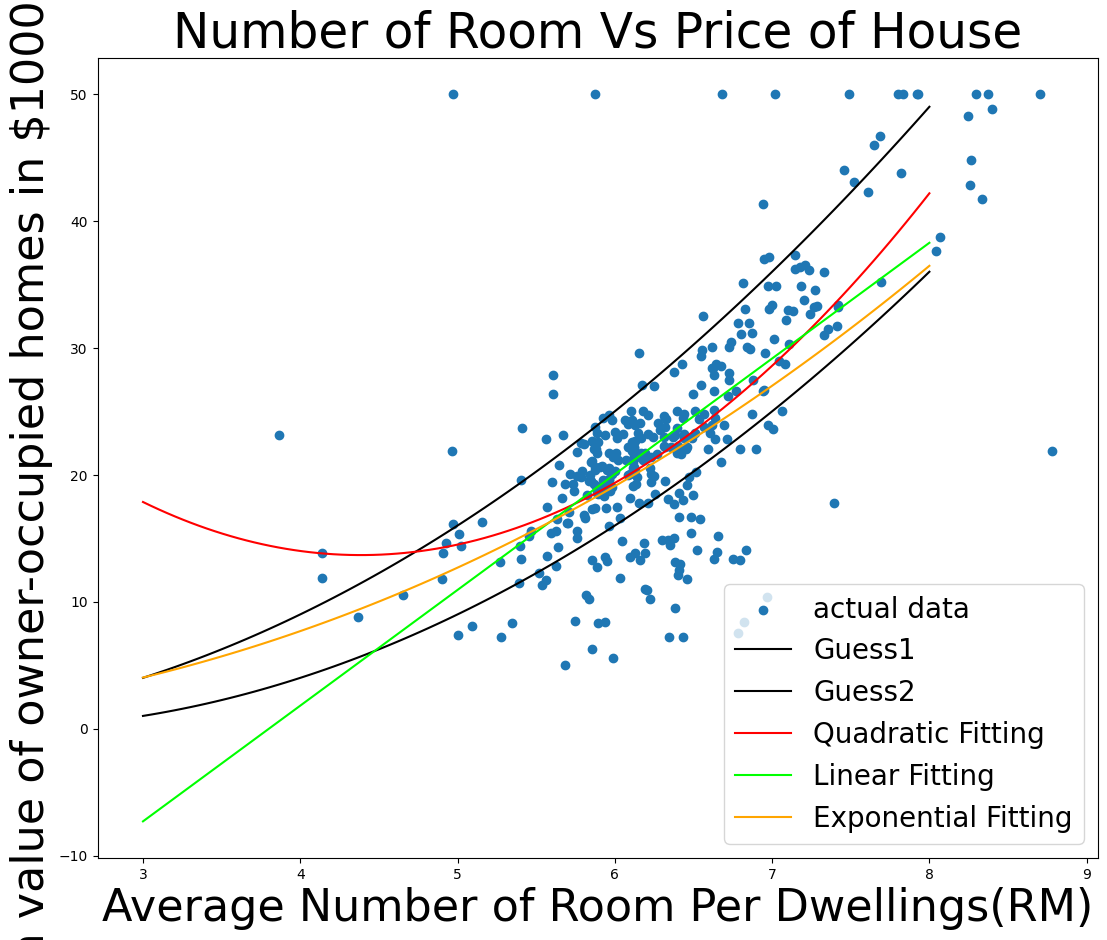

In [79]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=32)
ax.set_ylabel("Median value of owner-occupied homes in $1000'(MEDV)",fontsize=32)
ax.set_title("Number of Room Vs Price of House",fontsize=35)
ax.scatter(data2['x'],data2['y'],label="actual data")
ax.plot(array,np.vectorize(lambda x:((x-1)**2))(array),'black',label="Guess1")
ax.plot(array,np.vectorize(lambda x:((x-2)**2))(array),'black',label="Guess2")
ax.plot(array,np.vectorize(soln)(array),'r',label="Quadratic Fitting")
ax.plot(array,np.vectorize(soln2)(array),'lime',label="Linear Fitting")
ax.plot(array,np.vectorize(soln3)(array),'orange',label="Exponential Fitting")
ax.legend(loc=4,fontsize=20)

In [59]:
data3['ylin']=data3['x'].apply(soln2)
data3['yquad']=data3['x'].apply(soln)
data3['yexp']=data3['x'].apply(soln3)
data3['errorlin']=data3['y']-data3['ylin']
data3['errorquad']=data3['y']-data3['yquad']
data3['errorexp']=data3['y']-data3['yexp']
data3.head()

,x,y,ylin,yquad,yexp,errorlin,errorquad,errorexp
173,6.416,23.6,23.839436,22.673319,22.212681,-0.239436,0.926681,1.387319
274,6.758,32.4,26.957827,25.958796,24.961800,5.442173,6.441204,7.438200
491,5.983,13.6,19.891298,19.245591,18.985398,-6.291298,-5.645591,-5.385398
72,6.065,22.8,20.638982,19.831942,19.575038,2.161018,2.968058,3.224962
452,6.297,16.1,22.754382,21.649784,21.297697,-6.654382,-5.549784,-5.197697


In [60]:
ymean=data3['y'].mean()

In [67]:
# Calculating accuracy of linear modeling
rsmelin=np.sqrt(((data3['errorlin']**2).sum())/data3['x'].count())
accuracylin=(1-(rsmelin/ymean))*100
accuracylin

70.32739943437947

In [68]:
# Calculating the accuracy of quadratic modeling
rsmequad=np.sqrt(((data3['errorquad']**2).sum())/data3['x'].count())
accuracyquad=(1-(rsmequad/ymean))*100
accuracyquad

73.51329154197266

In [69]:
# Calculating the accuracy of exponential modeling of type (a*b^x)
rsmeexp=np.sqrt(((data3['errorexp']**2).sum())/data3['x'].count())
accuracyexp=(1-(rsmeexp/ymean))*100
accuracyexp

71.36313654389244

In [104]:
data3.head()

,x,y,ylin,yquad,errorlin,errorquad
173,6.416,23.6,23.839436,22.673319,-0.239436,0.926681
274,6.758,32.4,26.957827,25.958796,5.442173,6.441204
491,5.983,13.6,19.891298,19.245591,-6.291298,-5.645591
72,6.065,22.8,20.638982,19.831942,2.161018,2.968058
452,6.297,16.1,22.754382,21.649784,-6.654382,-5.549784


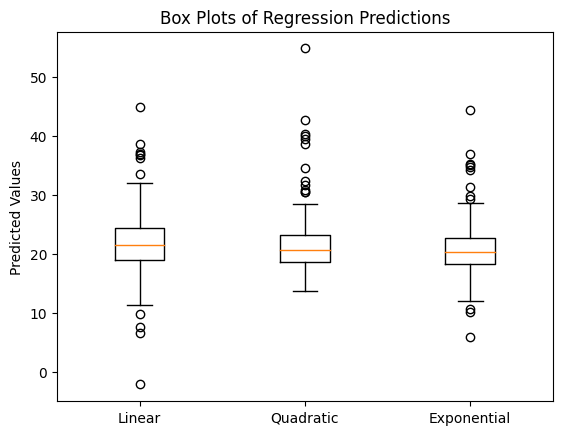

In [70]:
# Combine the predictions into a list
all_predictions = [data3['ylin'], data3['yquad'],data3['yexp']]

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(all_predictions)

# Set x-axis tick labels
ax.set_xticklabels(['Linear', 'Quadratic', 'Exponential'])

# Set y-axis label
ax.set_ylabel('Predicted Values')

# Set plot title
ax.set_title('Box Plots of Regression Predictions')

# Show the plot
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

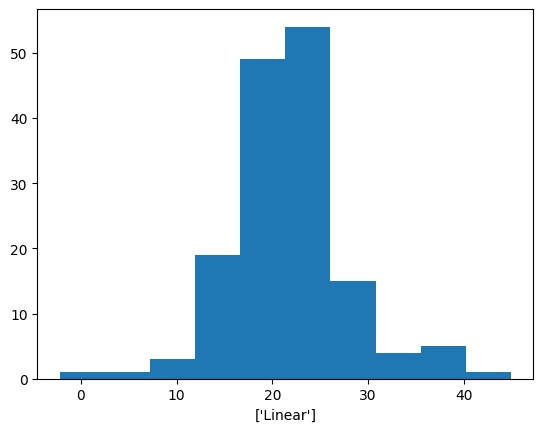

In [78]:
# Combine the predictions into a list
all_predictions = [data3['ylin'], data3['yquad'],data3['yexp']]

# Create the box plot
plt.hist(data3['ylin'])
plt.xlabel('Linear')
plt.ylabel('Predicted Values')
plt.title('Box Plots of Regression Predictions')
plt.show()

plt.hist(data3['yquad'])
plt.xlabel('Quadratic')
plt.ylabel('Predicted Values')
plt.title('Box Plots of Regression Predictions')
plt.show()

plt.hist(data3['yexp'])
plt.xabel(['Exponential'])
plt.label('Predicted Values')
plt.title('Box Plots of Regression Predictions')
plt.show()

In [105]:
data3['y'].describe()

count    152.000000
mean      21.407895
std        8.660633
min        5.000000
25%       16.325000
50%       20.000000
75%       24.125000
max       50.000000
Name: y, dtype: float64

In [106]:
data2['y_predict'].describe()

KeyError: 'y_predict'

In [ ]:
data2['error'].describe()

count    506.000000
mean     -10.372607
std       43.067623
min     -248.091768
25%      -15.596289
50%        2.661485
75%       12.181807
max       70.927769
Name: error, dtype: float64

In [ ]:
CV1=(data2['y'].std()/mean1)*100
print("Cofficient of Variance  of actual data= ",CV1)

CV1=(data2['y_predict'].std()/mean2)*100
print("Cofficient of Variance  of predicted data= ",CV1)

Cofficient of Variance  of actual data=  40.81650529938067
Cofficient of Variance  of predicted data=  30.22697536762584


In [ ]:
error=data2['error'].mean()
error=abs(error)
error

10.372606726263713

In [ ]:
print("Accuracy :",100-error)
print("Error :",error)

Accuracy : 89.62739327373629
Error : 10.372606726263713
